## 1. Reading a from file and convert it into different format.

In [1]:
# Import libraries
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt

import numpy as np

import operator
import sys

The “HW2_ who_talks_to_whom.xlsx” contains all the messages from all kinds of communications between the 2017/18 MSc Business Analytics class, for a particular week. The Excel file is converted to a CSV file in this exercise. For the sake of simplicity, we only use the sheet "sent".

In [2]:
place_holder = './'
# The file name
csvfile = "HW2_who_talks_to_whom_sent.csv"

### 1.1 We read from the file and start doing some preprocessing.

In [3]:
# Import the data
sent = pd.read_csv(place_holder + csvfile, index_col = 0)
sent

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86
Nodes,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,1.0,1.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,1.0,3.0,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,7,NaN,...,NaN,11.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,3.0,NaN,4.0,1.0,NaN,2.0,NaN,NaN,1,NaN,...,1.0,NaN,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,8.0,NaN,NaN,1.0,NaN,3,NaN,...,NaN,3.0,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN


We then drop the irrelevant columns.

In [4]:
col_names = sent.columns[81:86]
sent.drop(col_names, axis=1, inplace = True)

# starting from 81 -> 85, axis-1 is the column,
# Make NaN the values with 0
sent = sent.fillna(0)
sent = sent.replace("-",0)
sent.index = np.arange(0, len(sent))
sent.columns = [int(x)-1 for x in sent.columns]

# change the column name from the type string to int
sent[sent.columns] = sent[sent.columns].astype(int)

# change the contents to numeric in the sent dataframe
sent.apply(pd.to_numeric)
sent

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,5,1,1,5,2
1,2,0,0,1,3,0,5,0,0,0,...,0,2,4,0,0,0,0,0,0,0
2,0,0,0,1,0,2,0,0,7,0,...,5,0,0,0,3,0,11,2,2,0
3,0,0,1,0,1,0,0,0,0,1,...,0,2,1,5,1,0,0,3,0,1
4,0,3,0,0,0,0,2,0,0,0,...,0,2,3,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,3,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
77,3,0,4,1,0,2,0,0,1,0,...,20,1,0,0,2,1,0,3,1,1
78,0,0,0,8,0,0,1,0,3,0,...,0,2,0,0,1,0,3,0,3,2
79,4,0,2,2,0,2,0,2,4,0,...,1,0,0,0,10,0,1,4,0,1


### 1.2 Next, we print the network using different formats: an edge list, adjacency list and adjacency matrix.

To do that, we have to rely on Networkx.

In [5]:
# create the adjaceny matrix in Networkx format
dG_sent = nx.from_pandas_adjacency(sent, create_using = nx.DiGraph())

In [6]:
file = 'edgelist1.txt'

data = pd.read_csv(file,delimiter =' ',header=None)
data['hello'] = range(data.shape[0])
data.columns = ['source', 'target', 'weight', 'hello']
g = nx.from_pandas_edgelist(data,edge_attr=True)

g.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4, 'hello': 1}), (0, 3, {'weight': 4, 'hello': 7}), (0, 4, {'weight': 2, 'hello': 8}), (1, 2, {'weight': 9, 'hello': 2}), (1, 4, {'weight': 1, 'hello': 4}), (1, 3, {'weight': 8, 'hello': 5}), (2, 3, {'weight': 4, 'hello': 3}), (3, 4, {'weight': 7, 'hello': 6})])

#### A. Output as edge list

In [7]:
nx.write_weighted_edgelist(dG_sent, sys.stdout)

0 12 1
0 13 5
0 17 2
0 21 3
0 24 2
0 32 20
0 35 2
0 39 2
0 40 2
0 41 5
0 46 1
0 48 18
0 49 2
0 51 2
0 54 3
0 56 5
0 63 3
0 74 1
0 76 5
0 77 1
0 78 1
0 79 5
0 80 2
1 0 2
1 3 1
1 4 3
1 6 5
1 11 2
1 18 2
1 23 3
1 24 3
1 25 5
1 26 14
1 27 2
1 28 1
1 31 2
1 34 10
1 35 3
1 36 3
1 37 2
1 38 2
1 41 2
1 45 2
1 47 5
1 52 2
1 57 12
1 59 4
1 60 1
1 67 1
1 68 1
1 72 2
1 73 4
2 3 1
2 5 2
2 8 7
2 10 43
2 13 2
2 15 2
2 16 2
2 17 8
2 20 8
2 21 8
2 30 3
2 39 4
2 40 6
2 44 9
2 46 5
2 49 7
2 50 2
2 51 3
2 52 2
2 53 3
2 55 1
2 56 2
2 58 32
2 59 1
2 61 5
2 62 5
2 66 3
2 71 5
2 75 3
2 77 11
2 78 2
2 79 2
3 2 1
3 4 1
3 9 1
3 13 2
3 14 8
3 16 10
3 17 2
3 19 5
3 20 1
3 28 1
3 30 1
3 31 2
3 32 1
3 35 2
3 36 3
3 38 1
3 39 4
3 43 1
3 46 10
3 49 1
3 53 2
3 59 1
3 62 1
3 63 6
3 65 3
3 66 2
3 67 1
3 68 1
3 72 2
3 73 1
3 74 5
3 75 1
3 78 3
3 80 1
4 1 3
4 6 2
4 11 20
4 18 1
4 20 3
4 23 2
4 25 3
4 26 2
4 31 1
4 34 3
4 36 1
4 37 2
4 38 1
4 39 3
4 45 1
4 47 20
4 54 3
4 57 5
4 59 1
4 68 20
4 72 2
4 73 3
4 76 3
5 48 15
5 49

In [8]:
# We can also use pandas to do the conversion
nx.to_pandas_edgelist(dG_sent)

,source,target,weight
0,0,12,1
1,0,13,5
2,0,17,2
3,0,21,3
4,0,24,2
...,...,...,...
2041,80,63,1
2042,80,68,1
2043,80,71,1
2044,80,77,1


#### B. Output as adjacency list

In [9]:
nx.write_adjlist(dG_sent, sys.stdout)

#C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py -f C:\Users\Achyuthuni\AppData\Roaming\jupyter\runtime\kernel-a664d18e-6911-4dda-b540-f27ad5c63e6e.json
# GMT Sun Jun 27 13:08:14 2021
# 
0 12 13 17 21 24 32 35 39 40 41 46 48 49 51 54 56 63 74 76 77 78 79 80
1 0 3 4 6 11 18 23 24 25 26 27 28 31 34 35 36 37 38 41 45 47 52 57 59 60 67 68 72 73
2 3 5 8 10 13 15 16 17 20 21 30 39 40 44 46 49 50 51 52 53 55 56 58 59 61 62 66 71 75 77 78 79
3 2 4 9 13 14 16 17 19 20 28 30 31 32 35 36 38 39 43 46 49 53 59 62 63 65 66 67 68 72 73 74 75 78 80
4 1 6 11 18 20 23 25 26 31 34 36 37 38 39 45 47 54 57 59 68 72 73 76
5 48 49 56 66 77
6 1 4 11 12 18 22 24 25 26 27 31 36 37 38 45 47 52 57 59 67 68 72 73 78
7 0 9 13 20 32 37 42 46 48 52 61 73 79
8 2 3 5 10 11 16 18 21 27 30 39 40 44 46 49 51 52 53 55 58 60 61 62 63 66 70 71 74 75 77 78 79 80
9 3 11 14 24 25 26 27 31 36 37 38 45 47 52 57 59 60 67 68 73
10 0 2 5 12 13 16 17 20 21 22 30 32 35 39 40 44 46 49 51 52 53 55 56 58 61 62 63 65 66 6

#### C. Output as adjaceny matrix. This relies on numpy.

In [10]:
nx.to_numpy_matrix(dG_sent)

matrix([[0., 0., 0., ..., 1., 5., 2.],
        [2., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 2., 2., 0.],
        ...,
        [0., 0., 0., ..., 0., 3., 2.],
        [4., 0., 2., ..., 4., 0., 1.],
        [2., 0., 1., ..., 2., 0., 0.]])

Details about how the conversion between libraries can be done can be found: https://networkx.github.io/documentation/stable/reference/convert.html

Note that conversion to/from the adjacency list using Numpy, Pandas is not supported.

### 1.3 Additional Exercise: Read an node-edge incidence matrix from a file as an undirected graph.

The file used in this example is 'incmat1.txt'. After loading the matrix the information about the graph will be displayed.

In [11]:
G0_txt = np.loadtxt(place_holder + 'incmat1.txt')
M0 = np.matrix(G0_txt, dtype=int)

# convert incidence matrix to adjacency matrix by multiplying with its transpose
AM0 = (np.dot(M0, M0.T) > 0).astype(int)

# Mark 0 along the diagonal
np.fill_diagonal(AM0, 0)
G0 = nx.from_numpy_matrix(AM0)

# Print the graph information
print("\nPrinting G0")
nx.write_weighted_edgelist(G0, sys.stdout)


Printing G0
0 2 1
0 4 1
1 2 1
1 4 1
2 3 1
2 4 1
3 4 1


BUT WHY?

For example, given the following incidence matrix:

$$\begin{bmatrix} 
A1 & A2 \\ 
B1 & B2 \\ 
C1 & C2 \end{bmatrix}$$

We obtain the corresponding adjacency matrix by

$$\begin{bmatrix} 
A1 & A2 \\ 
B1 & B2 \\ 
C1 & C2  \end{bmatrix}
\begin{bmatrix} 
A1 & B1 & C1 \\ 
A2 & B2 & C2 \end{bmatrix}
= 
\begin{bmatrix} 
A1A1+A2A2 & A1B1 + A2B2 & A1C1 + A2C2\\ 
B1A1+B2A2 & B1B1 + B2B2 & B1C1 + B2C2\\  
C1A1+C2A2 & C1B1 + C2B2 & C1C1 + C2C2\\\end{bmatrix}$$

## 2. Plotting the network.

### 2.1 Try out different layout

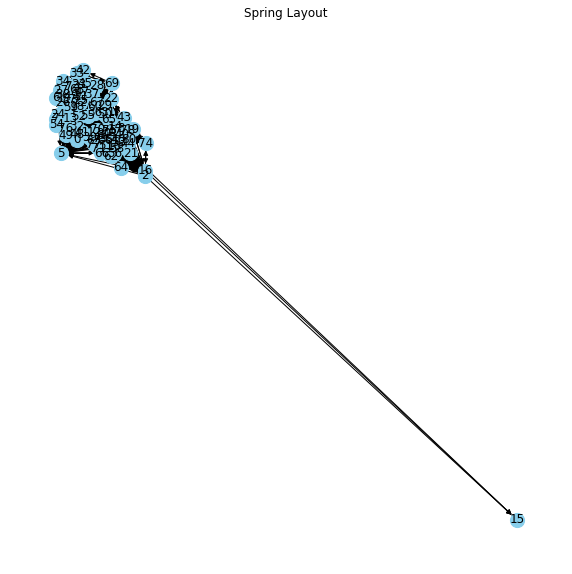

In [12]:
plt.subplots(figsize=(10, 10))
plt.title("Spring Layout")
nx.draw_spring(dG_sent, with_labels = True, \
                node_color='skyblue', node_size=200, \
                edge_color='black')

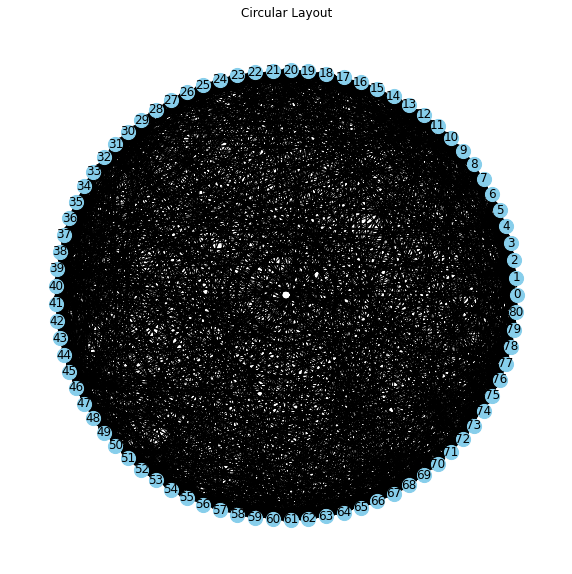

In [13]:
plt.subplots(figsize=(10, 10))
plt.title("Circular Layout")
nx.draw_circular(dG_sent, with_labels = True, \
                node_color='skyblue', node_size=200, \
                edge_color='black')

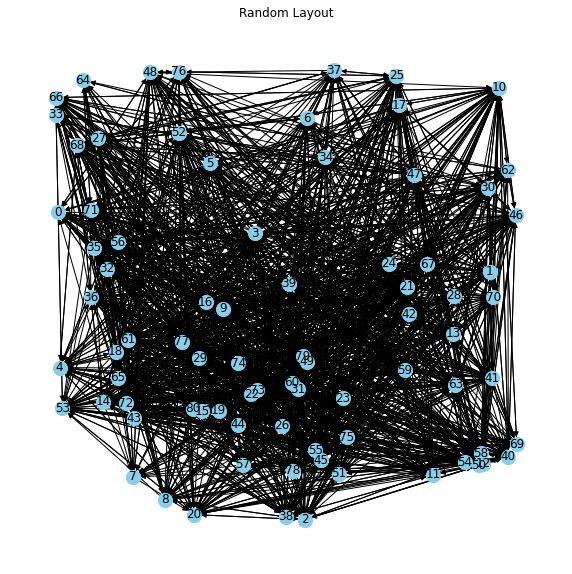

In [14]:
plt.subplots(figsize=(10, 10))
plt.title("Random Layout")
nx.draw_random(dG_sent, with_labels = True, \
               node_color='skyblue', node_size=200, \
               edge_color='black')

Note that the label above if off by 1. 

### 2.2 Change the node size and color based on the communication

First, we need to rename the node so that it starts from 1 instead of 0. We use the lambda function here.

A **lambda function** is a small *anonymous* function taking any number of arguments but only one expression. It is useful as an anonymous function inside another function without being defined separately.

In [15]:
# rename the label in-place
nx.relabel_nodes(dG_sent, lambda x: x+1, copy=False)

We adjust the node size and thickness of the edge based on the communication count.

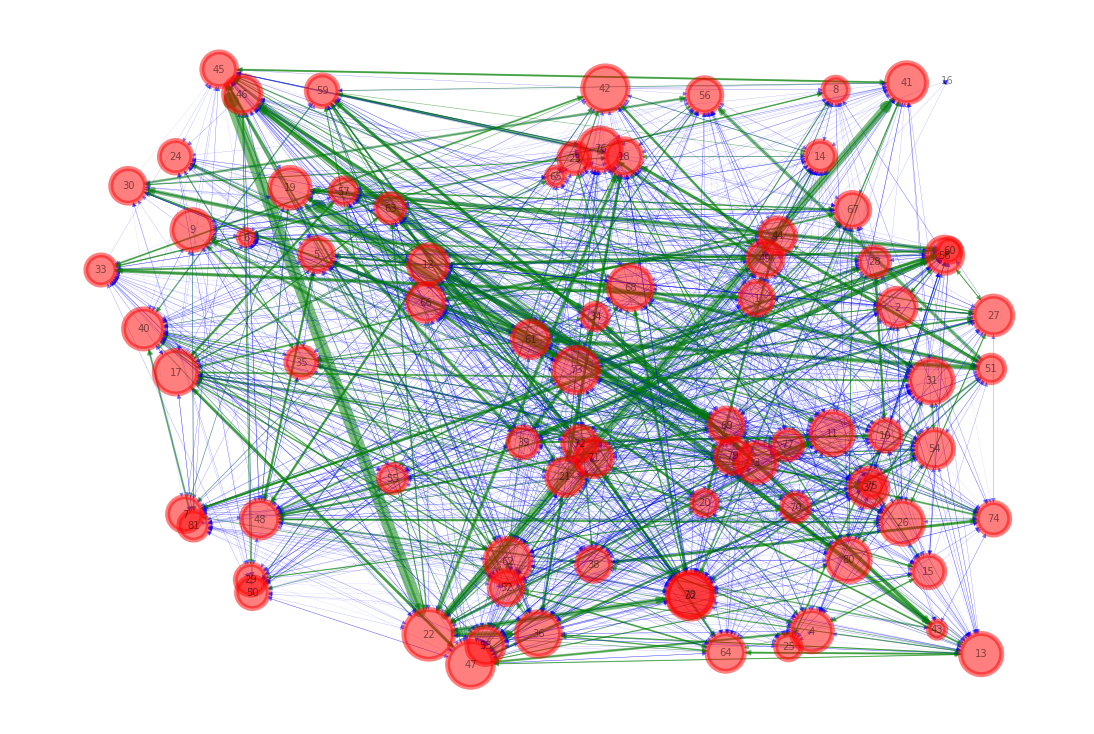

In [16]:
d_out = dict(dG_sent.out_degree())
for u,v in dG_sent.edges():
    # green edge if they communicated more than 5 times
    if dG_sent[u][v]['weight'] > 5 :
        dG_sent[u][v]['color'] = 'green'
    
    # blue otherwise
    else:
        dG_sent[u][v]['color'] = 'blue'

plt.figure(figsize = (15,10))
    
# Nodes with more out-going edge will be larger,
# Edge with a larger value for 'talks' will also be thicker
# alpha sets the transparency
nx.draw(dG_sent, pos = nx.random_layout(dG_sent), \
    with_labels = True, node_color = 'red', \
    node_size = [v * 50 for v in d_out.values()], \
    width = [dG_sent[u][v]['weight'] / 10 for u,v in dG_sent.edges()], \
    edge_color = [dG_sent[u][v]['color'] for u,v in dG_sent.edges()], \
    linewidths = 5, alpha = 0.5, font_size = 10)    

## 3. Centrality measures

Lets compute centrality measures using inbuilt functions.

In [17]:
G1 = nx.read_edgelist('social_network.txt',nodetype=str,delimiter=',')

for u, v, d in G1.edges(data=True):
    d['weight'] = 2

{('CCL', 'Double'): Text(0.10100351638967381, 0.14680951335180292, '2'),
 ('CCL', 'Grin'): Text(0.08153774684493077, 0.24162471052976686, '2'),
 ('CCL', 'Zap'): Text(0.08829162836929313, 0.1588283341330484, '2'),
 ('Double', 'Kringel'): Text(0.021960234107337818, 0.1407596934523742, '2'),
 ('Double', 'Oscar'): Text(0.01830440701575839, 0.02484455991658256, '2'),
 ('Double', 'SN4'): Text(0.02624700590194224, 0.18886173556257146, '2'),
 ('Double', 'Topless'): Text(-0.021587432019229427, 0.16724942238431528, '2'),
 ('Double', 'Zap'): Text(0.04077689977428798, 0.12168058253385144, '2'),
 ('DN16', 'Feather'): Text(0.23400813489869515, -0.6578855220835638, '2'),
 ('DN16', 'Gallatin'): Text(0.22437197235495224, -0.6386866775978328, '2'),
 ('DN16', 'Wave'): Text(0.3278390915509593, -0.6701857751302682, '2'),
 ('DN16', 'Web'): Text(0.2524179750851581, -0.5875374723829572, '2'),
 ('Feather', 'DN21'): Text(0.20661839925953523, -0.6211392244964298, '2'),
 ('Feather', 'Gallatin'): Text(0.1752224596

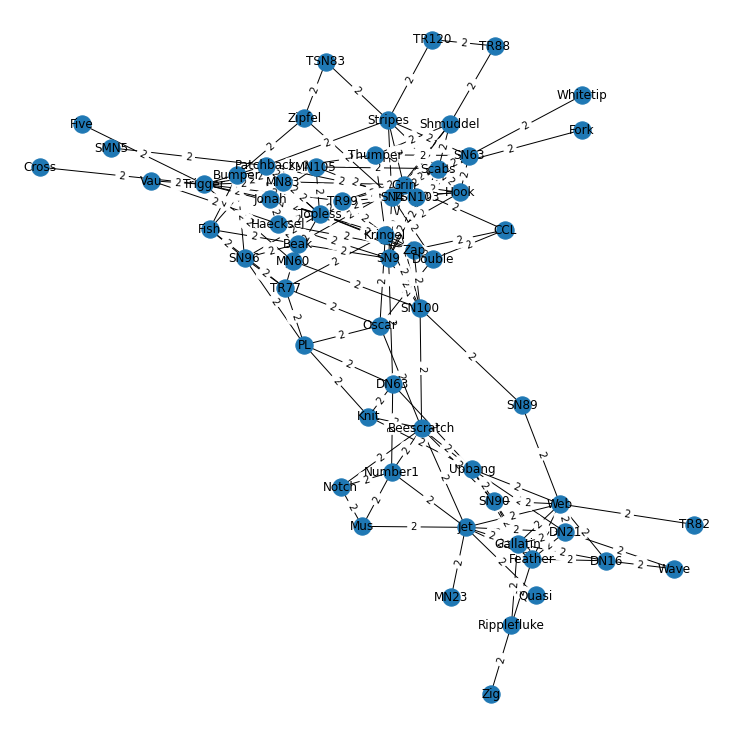

In [18]:
# Read an un-directed graph from a list of edges
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G1)
labels = nx.get_edge_attributes(G1,'weight')
nx.draw(G1, pos, with_labels = True)
nx.draw_networkx_edge_labels(G1, pos, edge_labels = labels)

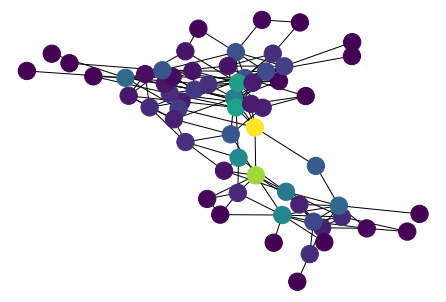

In [19]:
centrality = nx.betweenness_centrality(G1)
nx.draw(G1,pos=pos,node_color=list(centrality.values()))

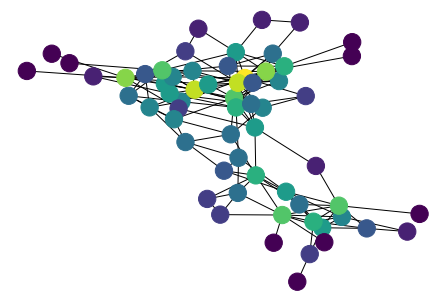

In [20]:
centrality = nx.degree_centrality(G1)
nx.draw(G1,pos=pos,node_color=list(centrality.values()))

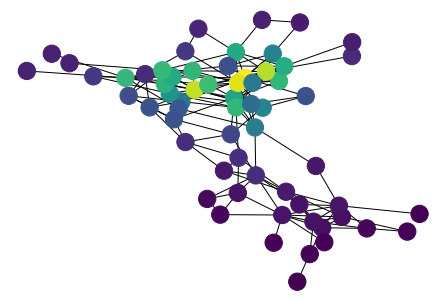

In [21]:
centrality = nx.eigenvector_centrality(G1)
nx.draw(G1,pos=pos,node_color=list(centrality.values()))

## 4. Community detection 

In [22]:
partition = nx.community.girvan_newman(G1)
comms = tuple(sorted(c) for c in next(partition))

0
1


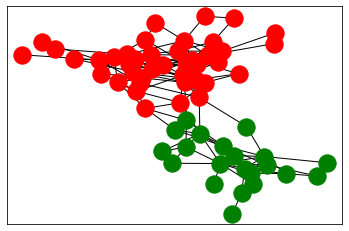

In [23]:
colors = 'rgb'
for i, nodes in enumerate(comms):
    print(i)
    nx.draw_networkx_nodes(G1, pos=pos, nodelist=nodes, node_color=colors[i])
    
nx.draw_networkx_edges(G1,pos=pos)

## 5. Additional Exercises

We need the community library from Networkx.

In [32]:
from networkx.algorithms import community

### 5.1 Using your judgement and based on the various exercises we did in class, represent the network the best way possible.

In [36]:
# Loading the network
G_social = nx.davis_southern_women_graph()

We then change the width of the edges based on the weight, and the size of the nodes based on the out-degree.

In [34]:

# Representing the size of the nodes based on their degree
degree = [G_social.degree()[node]*100 for node in G_social.nodes()]


Plotting the network.

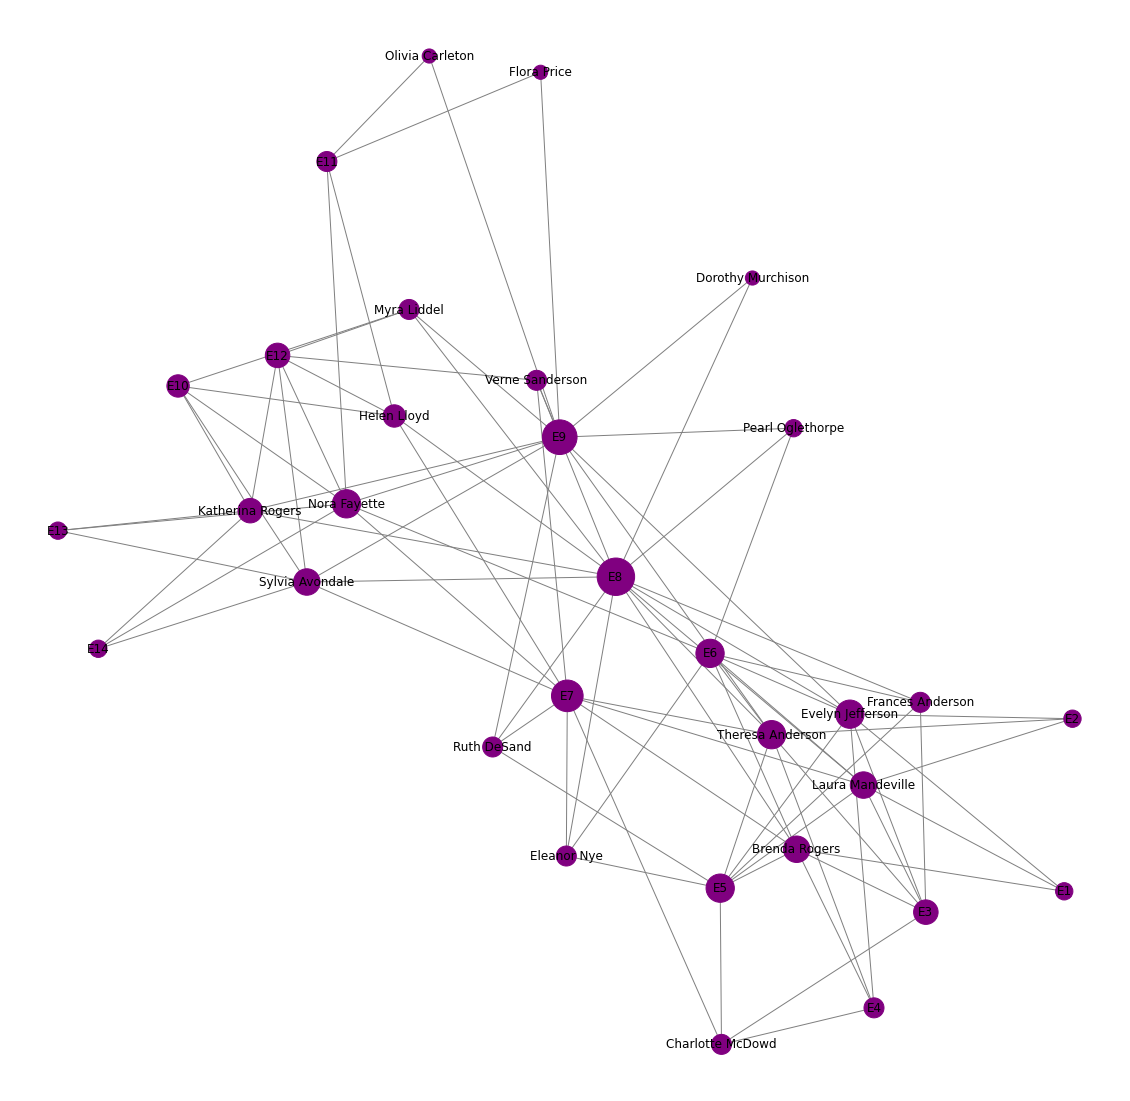

In [35]:
plt.subplots(figsize = (20,20))

pos = nx.spring_layout(G_social)
nx.draw(G_social, pos = pos, font_size = 12, with_labels = True, 
               node_size = degree, 
               edge_color = 'grey', node_color = 'purple')

plt.axis("off")

plt.show()

### 5.2 Choose and run an appropriate community detection algorithm to identify clusters.

In [28]:
color_list = ['r','y']

communities = community.kernighan_lin_bisection(G_social, max_iter=100)



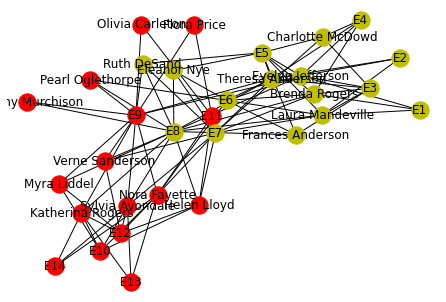

In [29]:
pos = nx.spring_layout(G_social)
nx.draw(G_social,pos, with_labels=True, node_size =100, node_color='w', node_shape = '.')

for i in range(len(communities)):
    nx.draw_networkx_nodes(G_social, pos, nodelist=communities[i], node_color=color_list[i])

Plotting the Network with the communities in color purple and yellow.

In [30]:
# Communities

color_map = ['purple'] * len(G_social.nodes())

nodes = list(G_social.nodes)

# We plot the communities in different colours
for node in nodes:
    if node in communities[0]:
        color_map[nodes.index(node)] = 'yellow'

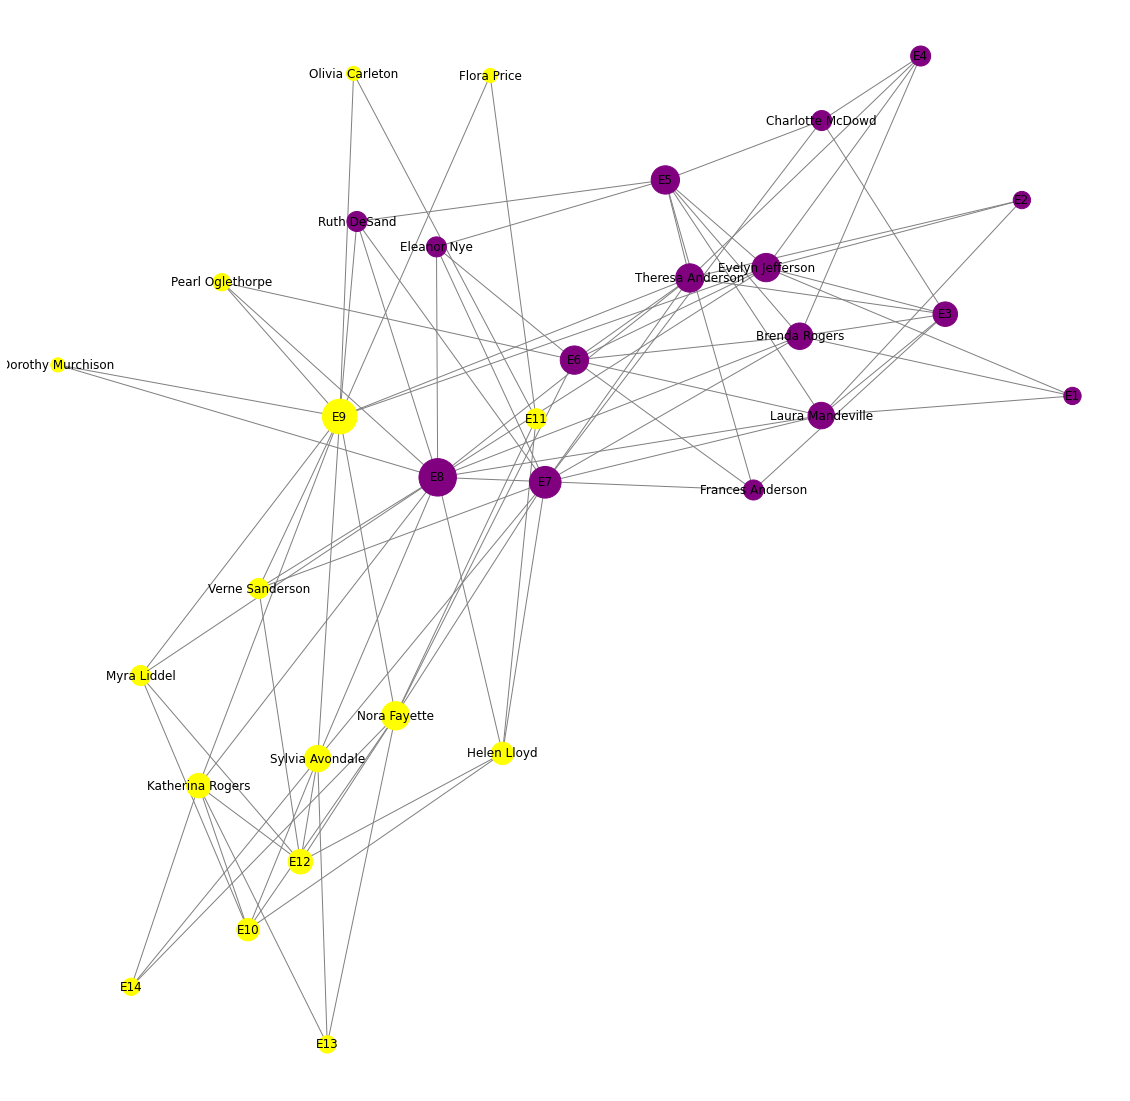

In [31]:
plt.subplots(figsize = (20,20))

nx.draw(G_social, pos = pos, font_size = 12, with_labels = True, \
               node_size = degree,
               edge_color = 'grey', node_color = color_map)

plt.axis("off")

plt.show()